# Journal 01: An Exploration in Simulating Stock Data for Analysis

#### `expand_array()` and `plot_array_w_slope()`

`expand_array()` simply inserts the average between two data points between said points, thus increasing the length of the initial array. Name subject to change

`plot_array_w_slope()` plots the given data, as well as the rate of change between points (first derivative of the)

In [723]:
import numpy as np
import matplotlib.pyplot as plt


def expand_array(array, runs = 1):
    
    temp = np.copy(array)

    for i in range(runs):
        new_array = []
        for x in range(len(temp)-1):
            val_avg = (temp[x] + temp[x+1]) / 2
            new_array.append(temp[x])
            new_array.append(val_avg)

        temp = np.copy(new_array)

    return new_array

def plot_array_w_slope(array):
    X = np.array(np.linspace(0, len(array), len(array), dtype=np.int64))
    
    slopes = np.gradient(array)

    plt.scatter(X, slopes, c='green', alpha=0.8)
    plt.scatter(X, array, c='red', alpha=0.8)


This subsection tracks the rate at which a given array will 'expand'. As shown in the following cell's output, the array's size increases at the rate of:

$$
\begin{equation}
Arr_{sz} = n(Inc_{prev} * 2 + 1)
\end{equation} 
$$

Where $n$ is determined by the initial length of the array

In [797]:
x = np.arange(1, 19)
print('Inital length: ' , len(x))

increases = []
inc_diffs = []
for i in range(1, 10):
    x_exp = expand_array(x, runs=i)
    increases.append((len(x) - len(x_exp))*-1)
    print('New Length:    ', len(x_exp))

increases = np.array(increases)    
print(np.int32(increases) / 16)


print(len(x_exp))
print(len(x) - len(x_exp))

Inital length:  18
New Length:     34
New Length:     66
New Length:     130
New Length:     258
New Length:     514
New Length:     1026
New Length:     2050
New Length:     4098
New Length:     8194
[  1.   3.   7.  15.  31.  63. 127. 255. 511.]
8194
-8176


## Initial Exploration

Here we are creating very simple data in an array to set up the problem for exploration.

The exploration started by attempting to identify and isolate the local minimums and maximums. This would in turn give us insight as to when to "buy" or "sell" a stock. As logic follows, if you wish to find the maximum profit possible in an array, you find the minimums and then try to 'sell' a stock at its next maximum.

Of course if we are simulating the stock market, an agent would not know when this maximum is to be found, and this is where a `dicount factor` is valuable to implement when training a Reinforcement Learning model of any kind. 

In [798]:
y = [10, 5, 3, 2, 0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0, -1, 0, 2, 3, 10]


indices = np.array(np.linspace(0, len(y), len(y), dtype=np.int64))

print(y, indices)

[10, 5, 3, 2, 0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0, -1, 0, 2, 3, 10] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20]


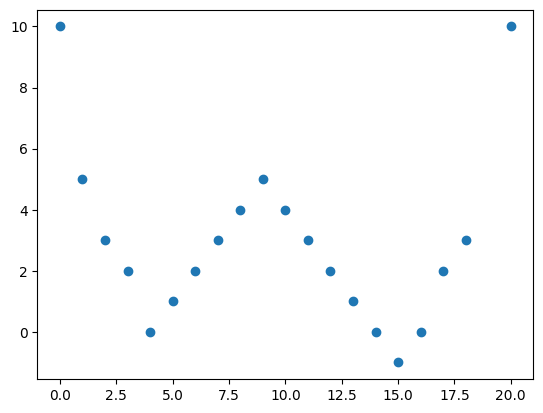

In [799]:
plt.scatter(indices, y)
plt.show()

This is a first step towards finding the rates of change, and through that the local minimums and maximums. Essentially the idea was to see where the arrays rate of change changes signs. It is also interesting to see how this data moves in these forms as well.

[10, 5, 3, 2, 0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0, -1, 0, 2, 3, 10]
[-5.  -3.5 -1.5 -1.5 -0.5  1.   1.   1.   1.   0.  -1.  -1.  -1.  -1.
 -1.   0.   1.5  1.5  4.   7. ]
[ 1.5   1.75  1.    0.5   1.25  0.75  0.    0.   -0.5  -1.   -0.5   0.
  0.    0.    0.5   1.25  0.75  1.25  2.75  3.  ]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20]


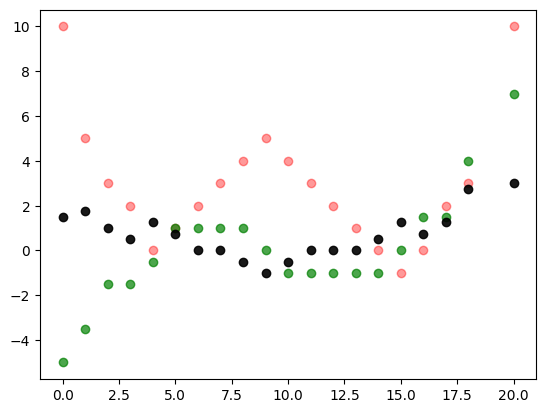

In [800]:
slopes = np.gradient(y)
slope_of_slopes = np.gradient(slopes)
indices = np.array(np.linspace(0, len(y), len(y), dtype=np.int64))

print(y)
print(slopes)
print(slope_of_slopes)
print(indices)

plt.scatter(indices, y, c='red', alpha=0.4)
plt.scatter(indices, slopes, c='green', alpha=0.7)
plt.scatter(indices, slope_of_slopes, c='black', alpha=0.9)


Here a better, more straight-forward means of finding the 

In [805]:
# first_der = np.gradient(y)
# signs = np.sign(first_der)
# second_der = np.diff(signs)

first_diff = np.diff(y)
signs = np.sign(first_diff)
second_diff = np.diff(signs)

print('y:           ', y)
print('first_diff:     ', first_diff)
print('signs:       ', signs)
print('second_diff:    ', second_diff)
print('indices:     ', indices)

mins = np.where(second_diff > 0)
print('mins:       ', mins)

maxes = np.where(second_diff < 0)
print('maxes:      ', maxes)



y:            [10, 5, 3, 2, 0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0, -1, 0, 2, 3, 10]
first_diff:      [-5 -2 -1 -2  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  2  1  7]
signs:        [-1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1]
second_diff:     [ 0  0  0  2  0  0  0  0 -2  0  0  0  0  0  2  0  0  0]
indices:      [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20]
mins:        (array([ 3, 14], dtype=int64),)
maxes:       (array([8], dtype=int64),)


In [729]:
print(type(mins))

for x in np.nditer(mins):
    print(x)

<class 'tuple'>
3
14


Here we are plotting vertical lines where the local minima and maxima are located, distinguished by color.

Green being a maximum, and dark red being a minimum

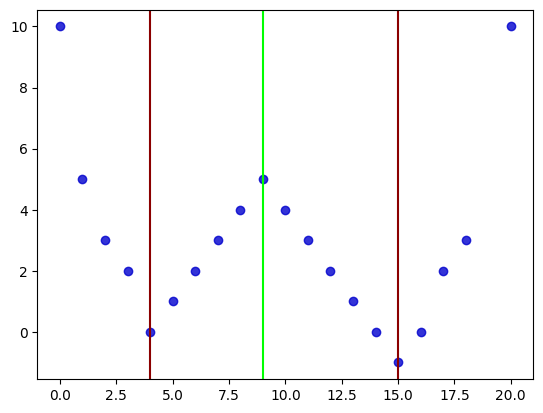

In [806]:
plt.scatter(indices, y, c='mediumblue', alpha=0.8)

for val in np.nditer(mins):
    plt.axvline(x=val+1, c='darkred')

for val in np.nditer(maxes):
    plt.axvline(x=val+1, c='lime')

plt.show()


### Automatically Finding and Plotting Minima and Maxima

Within this section we also add the functionality of shading the regions between minima and maxima.

Colors indicate the following:
- Green: Buy
- Red: Sell

In the future, when futher analysis is done, these regions' purpose will change, and will instead map to the regions that generate a distinct profit relative to an 'ideal buy-point' rather than simple divides between maximas and minimas.

In [809]:
def alternateMerge(arr1, arr2, n1, n2):
    i, j = 0, 0

    newArr = []

    while i < n1 and j < n2:
        newArr.append(arr1[i])
        i += 1

        newArr.append(arr2[j])
        j += 1

    while i < n1:
        newArr.append(arr1[i])
        i += 1

    while j < n2:
        newArr.append(arr2[j])
        j += 1

    return newArr


def find_min_maxes(arr, print_info=False):
    first_der = np.diff(arr)
    signs = np.sign(first_der)
    second_der = np.diff(signs)

    mins = np.where(second_der > 0)
    maxes = np.where(second_der < 0)

    if print_info:
        print('arr:        ', arr)
        print('first_der:  ', first_der)
        print('signs:      ', signs)
        print('second_der: ', second_der)

        print(mins)
        print(maxes)
    
    return mins[0], maxes[0]


def isolate_hills(arr, plot_kind='scatter', print_info=True, 
                  buy_sell_regions=False, figure_size=(10, 6)):
    indices = np.array(np.linspace(0, len(arr), len(arr), dtype=np.int64))

    mins, maxes = find_min_maxes(arr, print_info)

    plt.figure(figsize=figure_size)

    if plot_kind == 'scatter':
        plt.scatter(indices, arr, c='mediumblue', alpha=0.8)    
    elif plot_kind == 'line':
        plt.plot(indices, arr, c='mediumblue', alpha=0.8)

    for val in np.nditer(mins):
        plt.axvline(x=val+1, c='darkred', alpha=0.7)

    for val in np.nditer(maxes):
        plt.axvline(x=val+1, c='lime', alpha=0.7)

    if buy_sell_regions:
        minFirst = True

        print('mins[0]', mins[0])
        print('maxes[0]', maxes[0])

        if mins[0] < maxes[0]:
            mergedArr = alternateMerge(mins, maxes, len(mins), len(maxes))
        else:
            minFirst = False
            mergedArr = alternateMerge(maxes, mins, len(maxes), len(mins))

        print(mergedArr)

        #  3   8   14    
        # min max min 
        #  0   1   2   
        if minFirst:
            c = 'green'
            plt.axvspan(0, mergedArr[0]+1, color=c, alpha=0.3)
            
            for x in range(len(mergedArr)-1):
                if x % 2 == 0:
                    c = 'red'
                else:
                    c = 'green'

                plt.axvspan(mergedArr[x]+1, mergedArr[x+1]+1, color=c, alpha=0.3)

            if len(mergedArr) % 2 == 0:
                plt.axvspan(mergedArr[-1]+1, len(indices), color='green', alpha=0.3)
            else:
                plt.axvspan(mergedArr[-1]+1, len(indices), color='red', alpha=0.3)
        else:
            c = 'red'
            plt.axvspan(0, mergedArr[0]+1, color=c, alpha=0.3)
            
            for x in range(len(mergedArr)-1):
                if x % 2 == 0:
                    c = 'green'
                else:
                    c = 'red'

                plt.axvspan(mergedArr[x]+1, mergedArr[x+1]+1, color=c, alpha=0.3)

            if len(mergedArr) % 2 == 0:
                plt.axvspan(mergedArr[-1]+1, len(indices), color='red', alpha=0.3)
            else:
                plt.axvspan(mergedArr[-1]+1, len(indices), color='green', alpha=0.3)

    plt.show()


arr:         [10, 5, 3, 2, 0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0, -1, 0, 2, 3, 10]
first_der:   [-5 -2 -1 -2  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  2  1  7]
signs:       [-1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1]
second_der:  [ 0  0  0  2  0  0  0  0 -2  0  0  0  0  0  2  0  0  0]
indices:     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20]
(array([ 3, 14], dtype=int64),)
(array([8], dtype=int64),)
mins[0] 3
maxes[0] 8
[3, 8, 14]


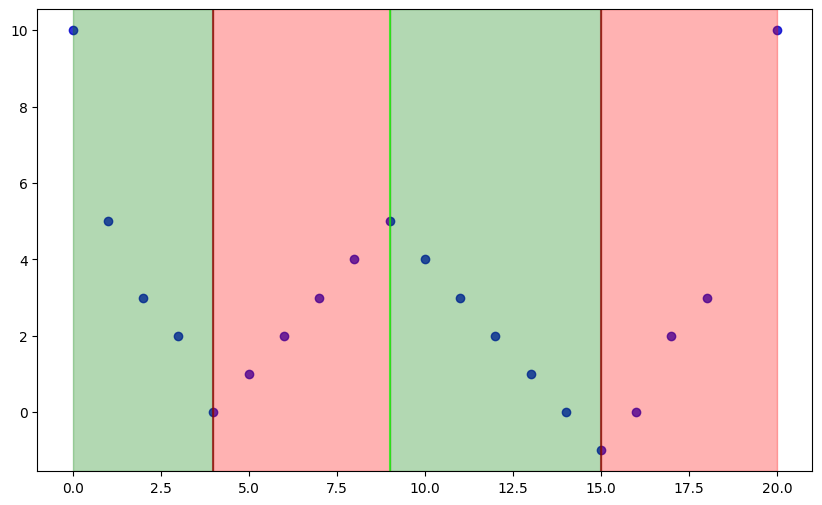

In [810]:
y = [10, 5, 3, 2, 0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0, -1, 0, 2, 3, 10]
indices = np.array(np.linspace(0, len(y), len(y), dtype=np.int64))

isolate_hills(y, buy_sell_regions=True)

## Creating More 'Realistic' Data

arr:         [0, 0.4967141530112327, -0.13826430117118466, 1.1444026911119252, 1.3847655552368408, 0.9102493163885892, 1.1506285982876603, 2.489462131895981, 1.918063327440569, 2.019987745961029, 2.4606233710265335, 1.5565700531485667, 1.9948936174562766, 1.7985323247146008, 0.08161337279847869, 0.07361449220156802, -0.480674156442494, -0.9392166281328558, -0.16642682384722013, -1.8472407036540668, -1.5787305251825117, -0.38159193473251274, -1.8045068256690473, -0.3140637300445889, -3.229255011882504, -0.8584464545697715, -3.118332422172638, -2.0094400319920744, -2.742634403826966, -2.610078721910879, -3.0343281536202427, -3.2117853341402762, -1.1820499691113049, -3.2252825588782104, -2.239760898067205, -2.402737646775021, -3.4606045480382273, -2.193874051770266, -5.420274671918003, -3.5220601006686962, -5.2234134360488795, -2.7835935206732856, -5.052045154858909, -2.899241803061526, -5.353148850448198, -4.3777637934289535, -6.072993058842907, -4.838402564388741, -5.015870832623991, -4

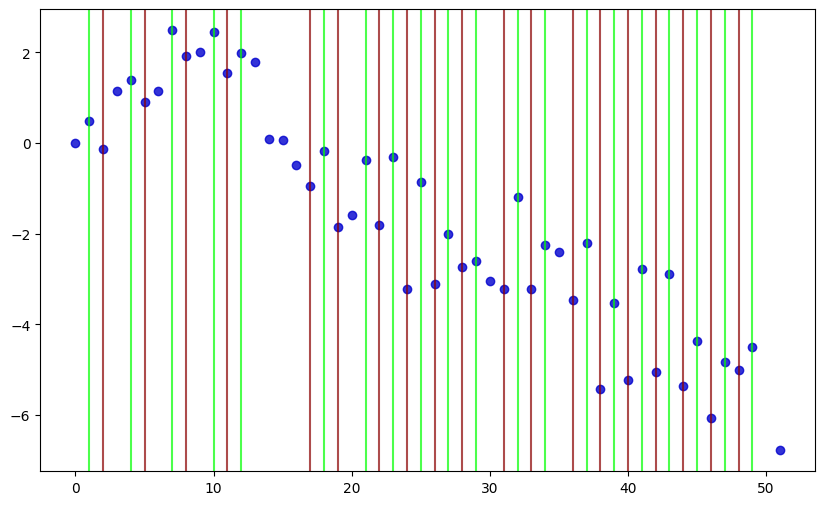

In [739]:
test_y = np.random.randn(50)
test_y

test_vals = [0]

for x in range(len(test_y)):
    test_vals.append(test_vals[x-1] + test_y[x])

isolate_hills(test_vals)


In [740]:
def generate_data(numVals, volatility):
    rng = np.random.default_rng()
    
    vals = [1]

    for x in range(numVals):
        rnd = rng.random()
        change_percent = 1.5 * volatility * rnd
        if change_percent > volatility:
            change_percent -= (2 * volatility)
        change_amount = vals[x] * change_percent
        vals.append(vals[x] + change_amount)

    return vals

vals = generate_data(20, 0.01)
print(vals)

[1, 1.003240641497266, 1.0046762217793712, 1.010790955687541, 1.0019270129788207, 1.0044865545197668, 1.0069786983616549, 1.0168462817394974, 1.0224615587081323, 1.0272735789248248, 1.0307694084565486, 1.0370614751481457, 1.0427696255731909, 1.0453779137647792, 1.0386013106400724, 1.0307427751242644, 1.0350599681781902, 1.036886616286354, 1.0428139452906096, 1.0456383854292257, 1.0470633712751767]


arr:         [1, 1.003240641497266, 1.0046762217793712, 1.010790955687541, 1.0019270129788207, 1.0044865545197668, 1.0069786983616549, 1.0168462817394974, 1.0224615587081323, 1.0272735789248248, 1.0307694084565486, 1.0370614751481457, 1.0427696255731909, 1.0453779137647792, 1.0386013106400724, 1.0307427751242644, 1.0350599681781902, 1.036886616286354, 1.0428139452906096, 1.0456383854292257, 1.0470633712751767]
first_der:   [ 0.00324064  0.00143558  0.00611473 -0.00886394  0.00255954  0.00249214
  0.00986758  0.00561528  0.00481202  0.00349583  0.00629207  0.00570815
  0.00260829 -0.0067766  -0.00785854  0.00431719  0.00182665  0.00592733
  0.00282444  0.00142499]
signs:       [ 1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.
  1.  1.]
second_der:  [ 0.  0. -2.  2.  0.  0.  0.  0.  0.  0.  0.  0. -2.  0.  2.  0.  0.  0.
  0.]
indices:     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20]
(array([ 3, 14], dtype=int64),)
(array([ 2, 12], dtype=int64),)
m

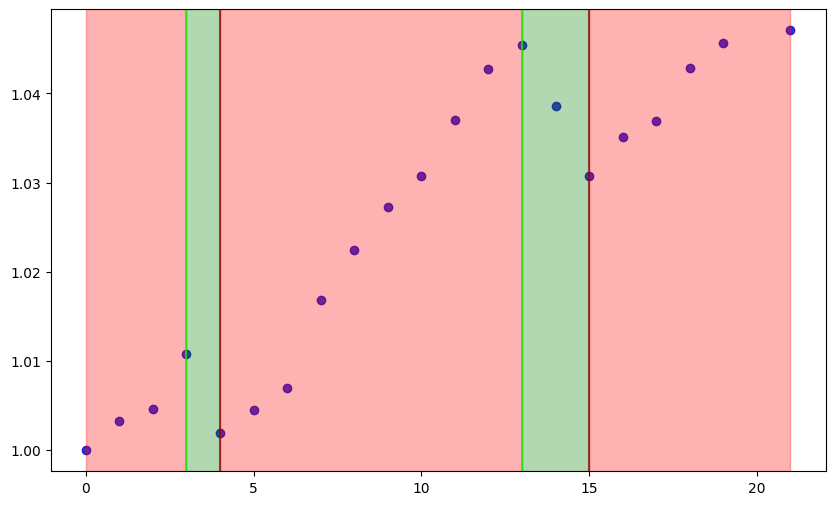

In [742]:
isolate_hills(vals, buy_sell_regions=True)

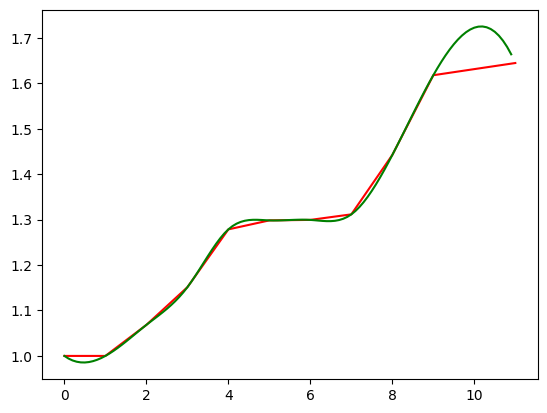

In [744]:
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline, BSpline

def SMA(arr, sma_range):
    SMAs = []

    for x in range(len(arr)):
        if x == 0:
            SMAs.append(arr[0])
        elif x <= sma_range:
            SMAs.append(np.sum(arr[:x]) / x)
        else:
            SMAs.append(np.sum(arr[x-sma_range:x]) / sma_range)

    return SMAs

def smooth_lines(arr, indices):
    i_new = np.arange(0, len(indices), 0.1)
    spl = make_interp_spline(indices, arr, k=3)

    return spl(i_new)

sma_test_data = generate_data(10, 0.2)
sma_test_values_3 = SMA(sma_test_data, 3)

indices = np.linspace(0, len(sma_test_data), len(sma_test_data), dtype=np.int32)

# f = interp1d(indices, sma_test_values_3)
# print(f(sma_test_values_3))
i_new = np.arange(0, len(sma_test_data), 0.1)
smoothed_sma_3 = smooth_lines(sma_test_values_3, indices)


plt.plot(indices, sma_test_values_3, c='r')
plt.plot(i_new, smoothed_sma_3, c='g')

plt.show()

mins[0] 4
maxes[0] 46
[4, 46, 50, 57, 63, 101]


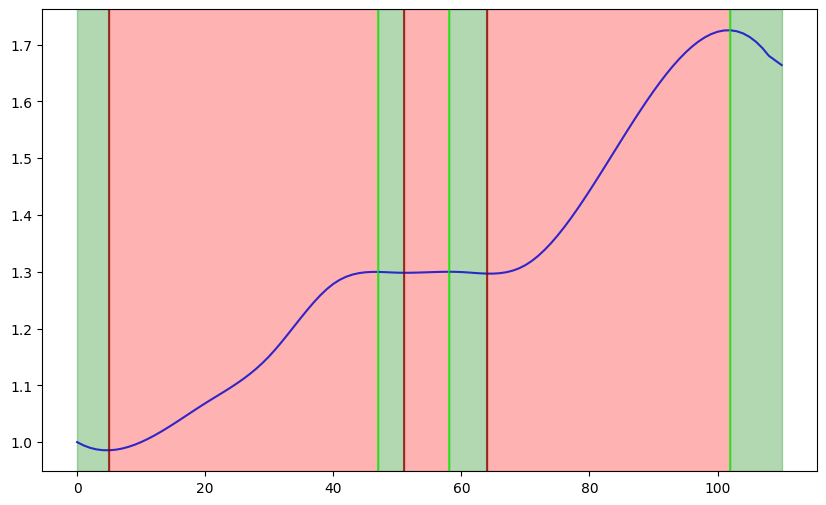

In [745]:
isolate_hills(smoothed_sma_3, plot_kind='line', print_info=False, buy_sell_regions=True)

[1.0, 0.9729242677038386, 0.9458485354076771, 0.9187728031115157, 0.8916970708153542, 0.9300449927558584, 0.9683929146963626, 1.0067408366368666, 1.045088758577371, 1.0132740874154367, 0.9814594162535022, 0.9496447450915678, 0.9178300739296334, 0.9190992542399403, 0.9203684345502473, 0.9216376148605543, 0.9229067951708612, 0.939539378922543, 0.9561719626742249, 0.9728045464259067, 0.9894371301775885, 0.953799309875694, 0.9181614895737994, 0.8825236692719048, 0.8468858489700103, 0.8231226894408677, 0.7993595299117252, 0.7755963703825827, 0.7518332108534401, 0.7809568054287928, 0.8100804000041453, 0.8392039945794978, 0.8683275891548504, 0.8792726510658149, 0.8902177129767794, 0.901162774887744, 0.9121078367987085, 0.9169741416740046, 0.9218404465493006, 0.9267067514245967, 0.9315730562998927, 0.8874724119601246, 0.8433717676203565, 0.7992711232805882, 0.7551704789408201, 0.7182137577144097, 0.6812570364879991, 0.6443003152615886, 0.6073435940351781, 0.6337215685560867, 0.6600995430769954

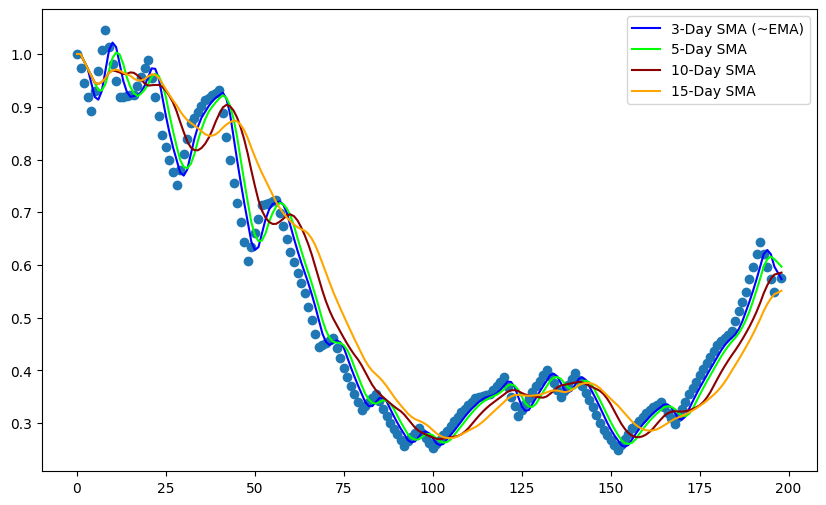

In [747]:
np.random.seed(42)

sma_test_data = generate_data(50, 0.2)
sma_test_data = expand_array(sma_test_data, 2)

# noise = np.random.normal(0, 0.009, len(sma_test_data))
# sma_test_data += noise


sma_test_values_3 = SMA(sma_test_data, 3)
sma_test_values_5 = SMA(sma_test_data, 5)
sma_test_values_10 = SMA(sma_test_data, 10)
sma_test_values_15 = SMA(sma_test_data, 15)

print(sma_test_data)
print(sma_test_values_3)
print(sma_test_values_5)
print(sma_test_values_10)

indices = np.linspace(0, len(sma_test_data), len(sma_test_data), dtype=np.int32)

plt.figure(figsize=(10, 6))
plt.scatter(indices, sma_test_data)
plt.plot(indices, sma_test_values_3, c='blue', label='3-Day SMA (~EMA)')
plt.plot(indices, sma_test_values_5, c='lime', label='5-Day SMA')
plt.plot(indices, sma_test_values_10, c='darkred', label='10-Day SMA')
plt.plot(indices, sma_test_values_15, c='orange', label='15-Day SMA')

smas = [sma_test_values_3, sma_test_values_5, sma_test_values_10, sma_test_values_15]

plt.legend(loc='upper right')

mins[0] 56
maxes[0] 4
[4, 56, 101, 152, 214, 299, 410, 504, 571, 713, 734, 829, 859, 946, 983, 1025, 1219, 1269, 1344, 1387, 1425, 1546, 1662, 1705, 1949]


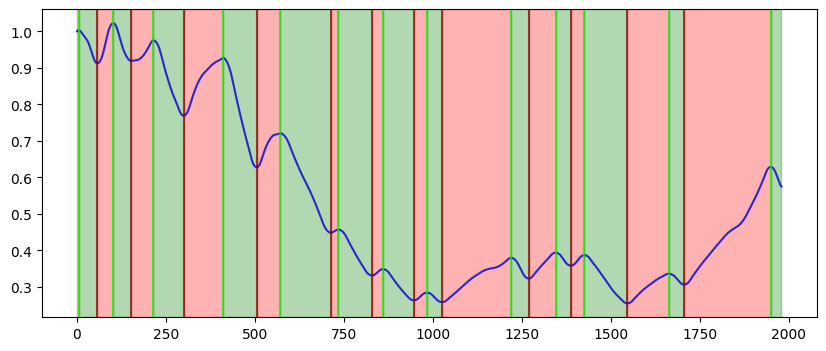

mins[0] 65
maxes[0] 4
[4, 65, 112, 170, 221, 308, 412, 516, 574, 732, 738, 842, 866, 957, 992, 1036, 1225, 1281, 1354, 1398, 1434, 1556, 1669, 1714, 1959]


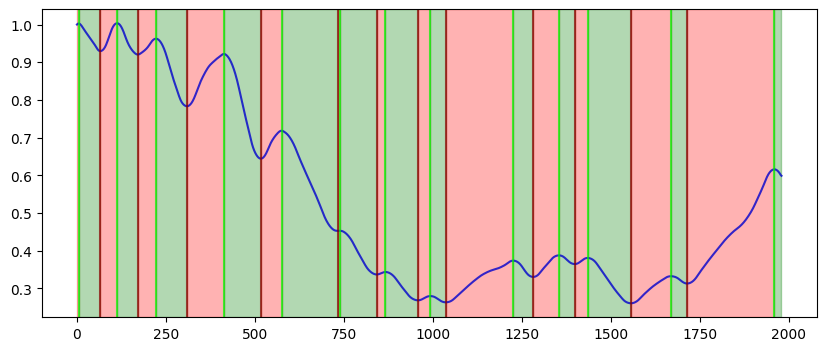

mins[0] 57
maxes[0] 4
[4, 57, 100, 135, 153, 202, 226, 337, 422, 556, 600, 1022, 1232, 1314, 1418, 1584, 1688, 1702]


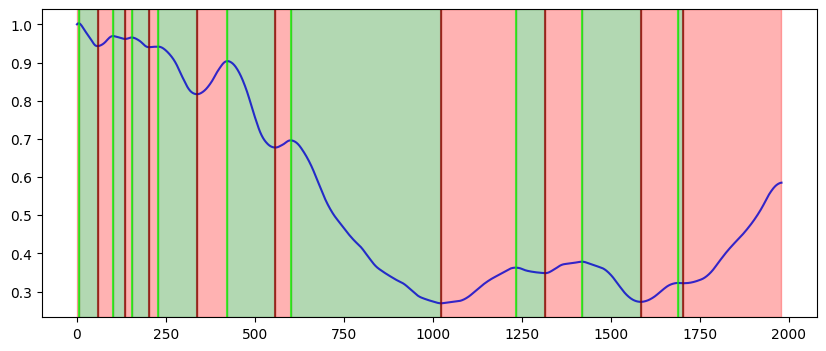

mins[0] 57
maxes[0] 4
[4, 57, 108, 176, 213, 376, 443, 1052, 1244, 1279, 1350, 1377, 1440, 1617]


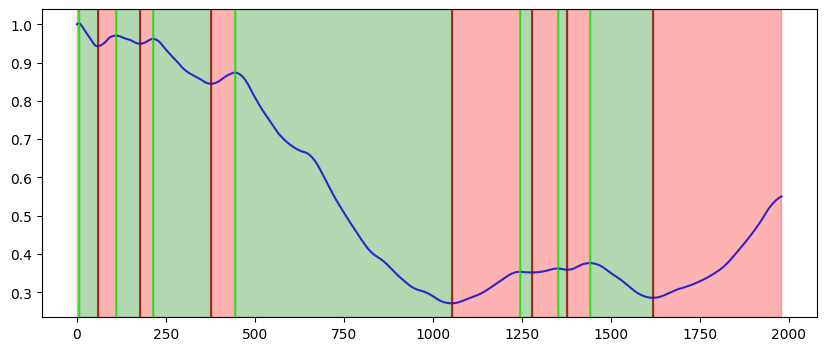

In [748]:
for sma in smas: 
    indices = np.linspace(0, len(sma), len(sma))
    smoothed_sma = smooth_lines(sma, indices)
    isolate_hills(smoothed_sma, plot_kind='line', print_info=False, 
                  buy_sell_regions=True, figure_size=(10, 4))

In [750]:

def continue_data(numVals, volatility, last_vals, range_of_old_data=1):
    rng = np.random.default_rng()
    
    if range_of_old_data >= len(last_vals):
        range_of_old_data = len(last_vals)

    vals = last_vals[-range_of_old_data:]
    

    for x in range(numVals):
        rnd = rng.random()
        change_percent = 1.5 * volatility * rnd
        if change_percent > volatility:
            change_percent -= (2 * volatility)
        change_amount = vals[x] * change_percent
        vals.append(vals[x] + change_amount)

    return vals

test_X = generate_data(5, 0.05)
print(type(test_X))
print(test_X[-5:])

test_X_cont = continue_data(10, 0.05, test_X, 5)

print('test_X len', len(test_X))
print(test_X)

print('test_X_cont len', len(test_X_cont))
print(test_X_cont)

<class 'list'>
[1.031426019551581, 1.0018646669224867, 0.9563156869761289, 0.9822740327794265, 1.017262527356184]
test_X len 6
[1, 1.031426019551581, 1.0018646669224867, 0.9563156869761289, 0.9822740327794265, 1.017262527356184]
test_X_cont len 15
[1.031426019551581, 1.0018646669224867, 0.9563156869761289, 0.9822740327794265, 1.017262527356184, 0.9882147658108088, 1.0467616977709393, 1.0008163204240397, 0.9450209428935267, 1.0420301334999953, 1.009631152268467, 1.0555368898915227, 0.9528210960397738, 0.9032560809203897, 1.0646010430909199]


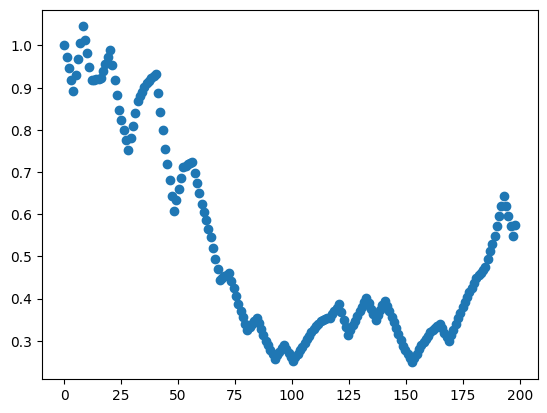

In [752]:
plt.scatter(indices, sma_test_data)
plt.show()

[  3  11  27  47  67  79  91  99 123 135 151 167 195]
[  7  19  39  55  71  83  95 119 131 139 163 191]
[[0.8916970708153542, 0.9300449927558584, 0.9683929146963626, 1.0067408366368666, 1.045088758577371, 1.0132740874154367, 0.9814594162535022, 0.9496447450915678, 0.9178300739296334], [0.9178300739296334, 0.9190992542399403, 0.9203684345502473, 0.9216376148605543, 0.9229067951708612, 0.939539378922543, 0.9561719626742249, 0.9728045464259067, 0.9894371301775885, 0.953799309875694, 0.9181614895737994, 0.8825236692719048, 0.8468858489700103, 0.8231226894408677, 0.7993595299117252, 0.7755963703825827, 0.7518332108534401], [0.7518332108534401, 0.7809568054287928, 0.8100804000041453, 0.8392039945794978, 0.8683275891548504, 0.8792726510658149, 0.8902177129767794, 0.901162774887744, 0.9121078367987085, 0.9169741416740046, 0.9218404465493006, 0.9267067514245967, 0.9315730562998927, 0.8874724119601246, 0.8433717676203565, 0.7992711232805882, 0.7551704789408201, 0.7182137577144097, 0.681257036487

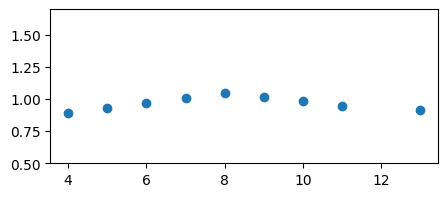

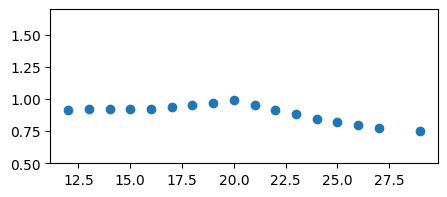

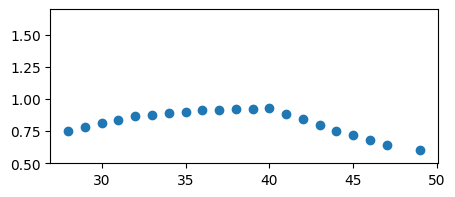

In [768]:
def extract_subsections(data, indices):
    pairs = []
    sub_data_arr = []
    sub_indices_arr = []

    for x in range(len(indices) - 1):
        pairs.append([indices[x]+1, indices[x+1]+2])

    for pair in pairs:
        sub_x1, sub_x2 = pair[0], pair[1]

        distance = sub_x2 - sub_x1
        sub_indices = np.linspace(sub_x1, sub_x2, distance, dtype=np.int64)
        sub_data = data[sub_x1:sub_x2]

        sub_data_arr.append(sub_data)
        sub_indices_arr.append(sub_indices)

    return sub_data_arr, sub_indices_arr

mins, maxes = find_min_maxes(sma_test_data)
print(mins)
print(maxes)

sub_data, sub_indices = extract_subsections(sma_test_data, mins)

print(sub_data)
print(sub_indices)


for x in range(3):
    plt.figure(figsize=(5,2))
    plt.ylim(0.5, 1.7)
    plt.scatter(sub_indices[x], sub_data[x])
    plt.show()

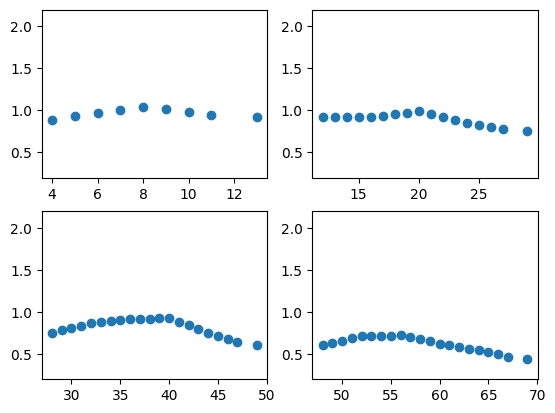

In [758]:
fig, axs = plt.subplots(2, 2)


axs[0, 0].set_ylim(0.2, 2.2)
axs[0, 0].scatter(sub_indices[0], sub_data[0])

axs[0, 1].set_ylim(0.2, 2.2)
axs[0, 1].scatter(sub_indices[1], sub_data[1])

axs[1, 0].set_ylim(0.2, 2.2)
axs[1, 0].scatter(sub_indices[2], sub_data[2])

axs[1, 1].set_ylim(0.2, 2.2)
axs[1, 1].scatter(sub_indices[3], sub_data[3])

plt.show()

In [774]:
def plot_4_sections(sub_indices, sub_data):
    fig, axs = plt.subplots(1, 4, figsize=(17, 3))


    axs[0].set_ylim(0.2, 2.2)
    axs[0].scatter(sub_indices[0], sub_data[0])

    axs[1].set_ylim(0.2, 2.2)
    axs[1].scatter(sub_indices[1], sub_data[1])

    axs[2].set_ylim(0.2, 2.2)
    axs[2].scatter(sub_indices[2], sub_data[2])

    axs[3].set_ylim(0.2, 2.2)
    axs[3].scatter(sub_indices[3], sub_data[3])

    plt.show()

[3, 7, 11, 19, 27, 39, 47, 55, 67, 71, 79, 83, 91, 95, 99, 119, 123, 131, 135, 139, 151, 163, 167, 191, 195]


[[0.8916970708153542, 0.9300449927558584, 0.9683929146963626, 1.0067408366368666, 1.045088758577371], [1.045088758577371, 1.0132740874154367, 0.9814594162535022, 0.9496447450915678, 0.9178300739296334], [0.9178300739296334, 0.9190992542399403, 0.9203684345502473, 0.9216376148605543, 0.9229067951708612, 0.939539378922543, 0.9561719626742249, 0.9728045464259067, 0.9894371301775885], [0.9894371301775885, 0.953799309875694, 0.9181614895737994, 0.8825236692719048, 0.8468858489700103, 0.8231226894408677, 0.7993595299117252, 0.7755963703825827, 0.7518332108534401], [0.7518332108534401, 0.7809568054287928, 0.8100804000041453, 0.8392039945794978, 0.8683275891548504, 0.8792726510658149, 0.8902177129767794, 0.901162774887744, 0.9121078367987085, 0.9169741416740046, 0.9218404465493006, 0.9267067514245967, 0.9315730562998927], [0.9315730562998927, 0.8874724119601246, 0.8433717676203565, 0.

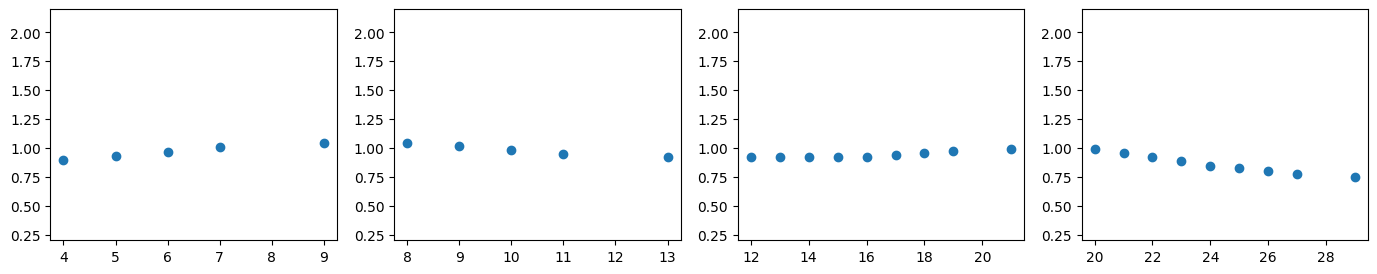

In [775]:
mins, maxes = find_min_maxes(sma_test_data)

mins_maxes = alternateMerge(mins, maxes, len(mins), len(maxes))

print(mins_maxes)
print()
print()

min_max_pairs, min_max_indices = extract_subsections(sma_test_data, mins_maxes)

print(min_max_pairs)
print()
print()
print(min_max_indices)

plot_4_sections(min_max_indices, min_max_pairs)


In [776]:
def extract_hills(data):
    mins, _ = find_min_maxes(data)
    hill_data, hill_indices = extract_subsections(data, mins)

    return hill_data, hill_indices

def extract_valleys(data):
    _, maxes = find_min_maxes(data)
    valley_data, valley_indices = extract_subsections(data, maxes)

    return valley_data, valley_indices

def extract_rises_falls(data):
    mins, maxes = find_min_maxes(data)

    if mins[0] < maxes[0]:
        mins_maxes = alternateMerge(mins, maxes, len(mins), len(maxes))
    else:
        mins_maxes = alternateMerge(maxes, mins, len(maxes), len(mins))

    min_max_pairs, min_max_indices = extract_subsections(data, mins_maxes)

    return min_max_pairs, min_max_indices